In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer         #bag of words(vector method)
from sklearn.feature_extraction.text import TfidfVectorizer         #tfidf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_json('Cell_Phones_and_Accessories_5.json', lines = True)         #in json there are multiple lines therefore lines = True
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [3]:
#check n remove duplicate data
df.dropna(inplace = True)

In [4]:
#shape after dropping the null and duplicate values
df.shape         

(190920, 9)

In [5]:
#Feature Engineering
df['review_category'] = df['overall'].apply( lambda x: 1 if(x>=4) else 0)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_category
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",1
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",1
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",1
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",1
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",1


In [6]:
#data processing
# where reviewtext is string and review category is int

df.info()            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190920 entries, 0 to 194438
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   reviewerID       190920 non-null  object
 1   asin             190920 non-null  object
 2   reviewerName     190920 non-null  object
 3   helpful          190920 non-null  object
 4   reviewText       190920 non-null  object
 5   overall          190920 non-null  int64 
 6   summary          190920 non-null  object
 7   unixReviewTime   190920 non-null  int64 
 8   reviewTime       190920 non-null  object
 9   review_category  190920 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 16.0+ MB


In [7]:
df['review_category'].value_counts()

1    145878
0     45042
Name: review_category, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:xlabel='review_category', ylabel='count'>

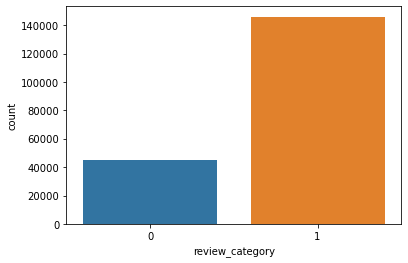

In [9]:
#approximately 0's value is one third of 1's vale
sns.countplot(df['review_category'])

In [10]:
#this is unbalanced data
#therefore we have to take 0s and 1s value equally differently


#for equal distribution take all values of 0 and take only approx one third value of 1 for balancing the data

#this is known as undersampling data (taking some part of data from original data)

In [11]:
df_0 = df.loc[df['review_category'] == 0][['review_category','reviewText']]

In [12]:
df_1 = df.loc[df['review_category'] == 1].sample(n = 45000, random_state = 123)[['review_category','reviewText']]

In [13]:
# concatinating df_0 and df_1 as 1 data(new data)
#df_new is the data of df_0 and df_1

df_new = pd.concat([df_0, df_1])                   
df_new = df_new.sample(frac = 1, random_state = 99)       

In [14]:
# now all the 0's and 1's value are approximately same
df_new['review_category'].value_counts()

0    45042
1    45000
Name: review_category, dtype: int64

<AxesSubplot:xlabel='review_category', ylabel='count'>

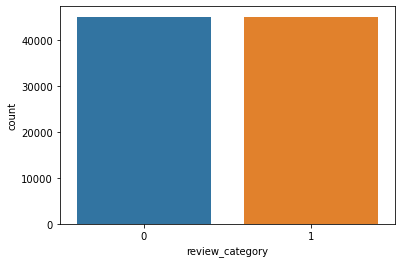

In [16]:
sns.countplot(df_new['review_category'])

In [17]:
x = df_new['reviewText']
y = df_new['review_category']

In [19]:
#import regEx(Regular expression)

import re

x_new = []
for w in x:
    w = re.sub('[^a-zA-Z ]','',w)        #removing special characters & punctuation from reviewText(x)
    w = w.lower()                        #converting all text data into loercase data
    x_new.append(w) 
    

In [57]:
#taking random example for x_new
x_new[16]

'ive spent a lot of time trying different s cases and ultimately have decided that this one is by far the best one currently out therecase crazyondigital protective cases for samsung galaxy s iii s  att tmobile sprint verizonblacki wanted to protect my phone so i started out with crazyondigitals case after a few days i felt that it was too bulky and found it hard to get in and out of my pocket i also quickly found that the battery in my s just didnt last as long as i needed it after a full day of work and train ride it was lucky to make it through the commute homecase hyperion samsung galaxy s iii battery boost case rechargeable battery coverwith the hope of something that was easier to get out of my pocket and the ability to add some extra battery time i began a new search and ended up trying the hyperion case when i got it i felt that it wasnt nearly as protective as my first one but the extra battery functionality worked wellish that it made me decide to keep it i had a few problems

In [58]:
# using test train split for testing and trainning the data
x_train,x_test,y_train,y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 222)

## Vectorizer  (Bag of words ) 

In [59]:
#text data to vector in tabular form

vector = CountVectorizer(stop_words = 'english').fit(x_new)      #fitting the x_new and transforming it 

In [60]:
x_train_vector = vector.transform(x_train)

In [61]:
#initializing our logistic regression model
model = LogisticRegression()
model.fit(x_train_vector, y_train)



LogisticRegression()

## 80% accuracy using vector

In [62]:
predictions_vec = model.predict(vector.transform(x_test))                
print(confusion_matrix(predictions_vec, y_test))
print(classification_report(predictions_vec, y_test))

[[7197 1758]
 [1801 7253]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8955
           1       0.80      0.80      0.80      9054

    accuracy                           0.80     18009
   macro avg       0.80      0.80      0.80     18009
weighted avg       0.80      0.80      0.80     18009



## seeing different examples and testing the output

In [63]:
print(model.predict(vector.transform(['damaged piece. Very bad service'])))

[0]


In [64]:
print(model.predict(vector.transform(['the product is amazing'])))

[1]


In [65]:
print(model.predict(vector.transform(['tatti product'])))

[0]


## now using Tf-IDF

In [66]:
#for semantic meaning of word using Tf-idf

In [67]:
vector_tf = TfidfVectorizer(stop_words = 'english').fit(x_train)

In [68]:
x_train_vector_tf = vector_tf.transform(x_train)

In [69]:
model_tf = LogisticRegression()
model_tf.fit(x_train_vector_tf, y_train)

LogisticRegression()

## 81% accuracy using Tf-idf

In [70]:
#check prediction using tfidf


predictions_tf = model_tf.predict(vector_tf.transform(x_test))
print(confusion_matrix(predictions_tf, y_test))
print(classification_report(predictions_tf, y_test))

[[7332 1678]
 [1666 7333]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9010
           1       0.81      0.81      0.81      8999

    accuracy                           0.81     18009
   macro avg       0.81      0.81      0.81     18009
weighted avg       0.81      0.81      0.81     18009



In [71]:
print(model_tf.predict(vector_tf.transform(['its almost good but bad'])))

[0]


In [72]:
#unable to performs the predictions
print(model.predict(vector.transform(['not so good after sell services'])))    

[1]


In [73]:
print(model.predict(vector.transform(['bad service at all'])))

[0]


In [113]:
#difference btween vector n tf-idf

#vector method only counts the word

#tsifd assigns a particular meaning to word


#we can only directly use Tsifd skipping vector method

# train data(80%) we have to fit to over model(trainnig or fitting to model) and test data(20%) we use for model test and predictions